## Exercise 4.9 - Implement value iteration for the gambler’s problem and solve it for $p_h$ = 0.25 and $p_h$ = 0.55. In programming, you may find it convenient to introduce two dummy states corresponding to termination with capital of 0 and 100, giving them values of 0 and 1 respectively. Show your results graphically, as in Figure 4.3. Are your results stable as $\theta \to 0$ ?

In [4]:
#imports
!pip install ipython-cache
import cache_magic
from random import randint
import sys
import math
import json
%matplotlib inline
import matplotlib.pyplot as plt
import math
from math import exp, factorial
import numpy as np
from random import choice

In [5]:
nStates = 100
pi = [0 for i in range(0, nStates+1)]

actions = {}
def getActions(n):
    global actions
    key = min(n, 100 - n)
    if not key in actions:
        if key == 0 or key == 100:
            actions[key] = [0]
        else:
            actions[key] = [i for i in range(1, key+1)]
    return actions[key]

def getReward (s, a):
    return 1 if s + a == 100 and s < 100 else 0

def calculateValue(s, a, pHeads):
    heads = pHeads * values[s + a]
    tails = (1 - pHeads) * values[s - a]
    
    return heads + tails

values = [0 for i in range(nStates+1)]
def valueIteration(pHeads, theta=10e-4):
    values = [0 for i in range(nStates+1)]
    values[100] = 1
    while True:
        delta = 0
        # iterate over states
        for s in range(nStates+1):
            v = values[s]
            for a in getActions(s):
                tempV = calculateValue(s, a, pHeads)
                if tempV > values[s]:
                    values[s] = tempV
            delta = max(delta, abs(v - values[s]))
        if delta < theta:
            break

def extractPolicy(pHeads):
    for s in range(nStates+1):
        possibleActions = []
        for a in getActions(s):
            tempV = calculateValue(s, a, pHeads)
            if abs(tempV - values[s]) < .1:
                possibleActions.append(a)
            pi[s] = choice(possibleActions)

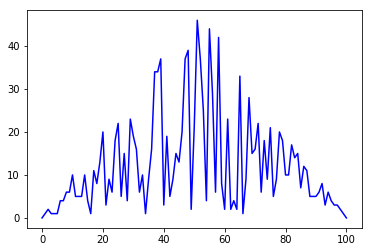

In [6]:
valueIteration(.4, theta=10e-3)
extractPolicy(.4)
plt.plot([i for i in range(nStates+1)], pi, 'b')

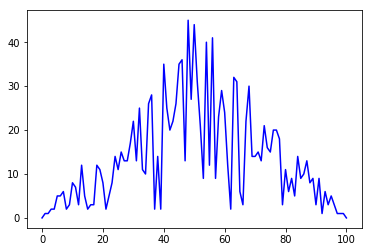

In [7]:
valueIteration(.4, theta=10e-4)
extractPolicy(.4)
plt.plot([i for i in range(nStates+1)], pi, 'b')

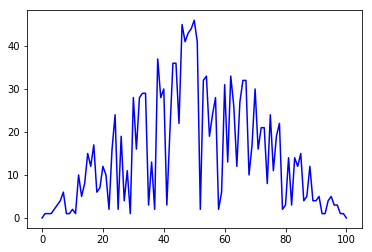

In [10]:
valueIteration(.4, theta=10e-5)
extractPolicy(.4)
plt.plot([i for i in range(nStates+1)], pi, 'b')

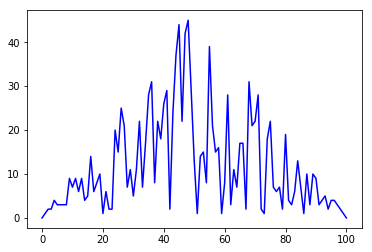

In [8]:
valueIteration(.25, theta=10e-4)
extractPolicy(.25)
plt.plot([i for i in range(nStates+1)], pi, 'b')

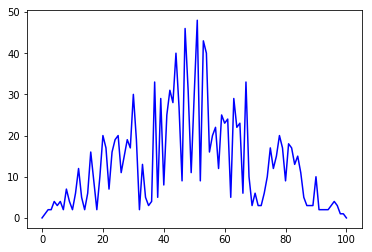

In [9]:
valueIteration(.55)
extractPolicy(.55)
plt.plot([i for i in range(nStates+1)], pi, 'b')